# Static FC analyses Stroke & Elderly

In [1]:
import sys

sys.path.append('/media/miplab-nas2/Data3/Nawal/Tools/StaticFC/')
sys.path.append('/media/miplab-nas2/Data3/Nawal/Tools/Clinical/')
from static_fc import StaticFC
from clinical_analyses import ClinicalAnalyses

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nibabel as nib
import os.path
import json

# Set numpy to print only 2 decimal digits for neatness
np.set_printoptions(precision=2, suppress=True)

%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/kinany/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## 0. Load configuration & patient data

In [48]:
with open('../config/sFC_config_age_stroke_young.json') as config_file:
    config = json.load(config_file)

In [9]:
patients = ClinicalAnalyses(config)

Creating instance for config age_stroke_young_C5toC7_gm
overwrite_clinical: True


In [10]:
clinical_info = patients.get_patient_info()

Extracting clinical data...
Done!


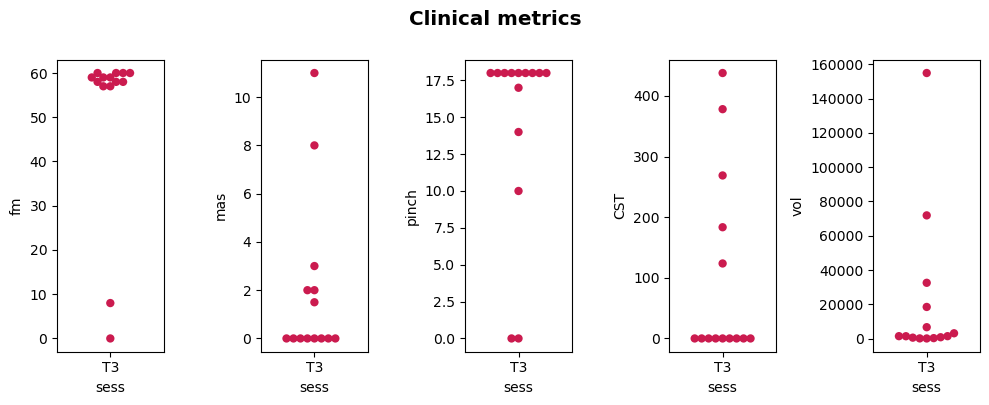

In [16]:
patients.plot_info(clinical_info,['fm','mas','pinch','CST','vol'])

## 1. Prepare FC data

#### 1a. Create instance of StaticFC class for further analyses

In [49]:
sFC = StaticFC(config) 

Creating instance for config age_stroke_young_C5toC7_gm
overwrite_denoising: False
overwrite_flipping: False
overwrite_smoothing: False
overwrite_tc: False
overwrite_corr: False
overwrite_alff_maps: False
overwrite_alff_rois: True


#### 1b. Prepare data
*_Denoise (filter or not) > Normalize to PAM50 > Flip if neeeded > Smooth_*

In [63]:
sFC.prepare_data()

PREPARE DATA
... Denoising
Overwrite old files: True
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:   37.1s
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:   37.1s finished
... Operation performed in 37.105 s
... Normalize denoised images
Overwrite old files: True
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.

--
Spinal Cord Toolbox (5.6)

sct_apply_transfo -i /media/miplab-nas2/Data3/SpinalCord/4_Age_Stroke/Young/RS_AS/func//RS_AS_fmri_moco_denoised_bp.nii.gz -d /media/miplab-nas2/Data3/SpinalCord/4_Age_Stroke/PAM50_Age_Stroke/template/PAM50_t2.nii.gz -w /media/miplab-nas2/Data3/SpinalCord/4_Age_Stroke/Young/RS_AS/func//Normalization/warp_fmri2template.nii.gz -x spline -o /media/miplab-nas2/Data3/SpinalCord/4_Age_Stroke/Young/RS_AS/func//RS_AS_fmri_moco_denoised_bp_pam50.nii.gz
--


Parse list of warping fields...

Get dimensions of data...
  144 x 48 x 27 x 240

Copying 

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0035.nii -o data_reg_T0035.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0036.nii -o data_reg_T0036.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0037.nii -o data_reg_T0037.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0038.nii -o data_reg_T0038.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0039.nii -o data_reg_T0039.nii -t warp_fmri2template.nii.gz -r P

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0110.nii -o data_reg_T0110.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0111.nii -o data_reg_T0111.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0112.nii -o data_reg_T0112.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0113.nii -o data_reg_T0113.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0114.nii -o data_reg_T0114.nii -t warp_fmri2template.nii.gz -r P

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0148.nii -o data_reg_T0148.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0149.nii -o data_reg_T0149.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0150.nii -o data_reg_T0150.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0151.nii -o data_reg_T0151.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0152.nii -o data_reg_T0152.nii -t warp_fmri2template.nii.gz -r P

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0186.nii -o data_reg_T0186.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0187.nii -o data_reg_T0187.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0188.nii -o data_reg_T0188.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0189.nii -o data_reg_T0189.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0190.nii -o data_reg_T0190.nii -t warp_fmri2template.nii.gz -r P

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0224.nii -o data_reg_T0224.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0225.nii -o data_reg_T0225.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0226.nii -o data_reg_T0226.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0227.nii -o data_reg_T0227.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127124308.992398-apply_transfo-8yfo6usj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0228.nii -o data_reg_T0228.nii -t warp_fmri2template.nii.gz -r P

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0035.nii -o data_reg_T0035.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0036.nii -o data_reg_T0036.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0037.nii -o data_reg_T0037.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0038.nii -o data_reg_T0038.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0039.nii -o data_reg_T0039.nii -t warp_fmri2template.nii.gz -r P

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0110.nii -o data_reg_T0110.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0111.nii -o data_reg_T0111.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0112.nii -o data_reg_T0112.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0113.nii -o data_reg_T0113.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0114.nii -o data_reg_T0114.nii -t warp_fmri2template.nii.gz -r P

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0148.nii -o data_reg_T0148.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0149.nii -o data_reg_T0149.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0150.nii -o data_reg_T0150.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0151.nii -o data_reg_T0151.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0152.nii -o data_reg_T0152.nii -t warp_fmri2template.nii.gz -r P

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0186.nii -o data_reg_T0186.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0187.nii -o data_reg_T0187.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0188.nii -o data_reg_T0188.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0189.nii -o data_reg_T0189.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0190.nii -o data_reg_T0190.nii -t warp_fmri2template.nii.gz -r P

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0224.nii -o data_reg_T0224.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0225.nii -o data_reg_T0225.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0226.nii -o data_reg_T0226.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0227.nii -o data_reg_T0227.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231127125853.088108-apply_transfo-znhmicnj
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0228.nii -o data_reg_T0228.nii -t warp_fmri2template.nii.gz -r P

####  1c. Load timecourses

In [50]:
tcs = sFC.extract_tcs()

Timecourses extraction
Overwrite old files: False
Timecourses already extracted, loading from .pkl fike...


### 2. Correlations analyses

#### 2a. Computations

ROI-TO-ROI CORRELATION
Overwrite old files: False
Correlations already computed, loading from .pkl fike...


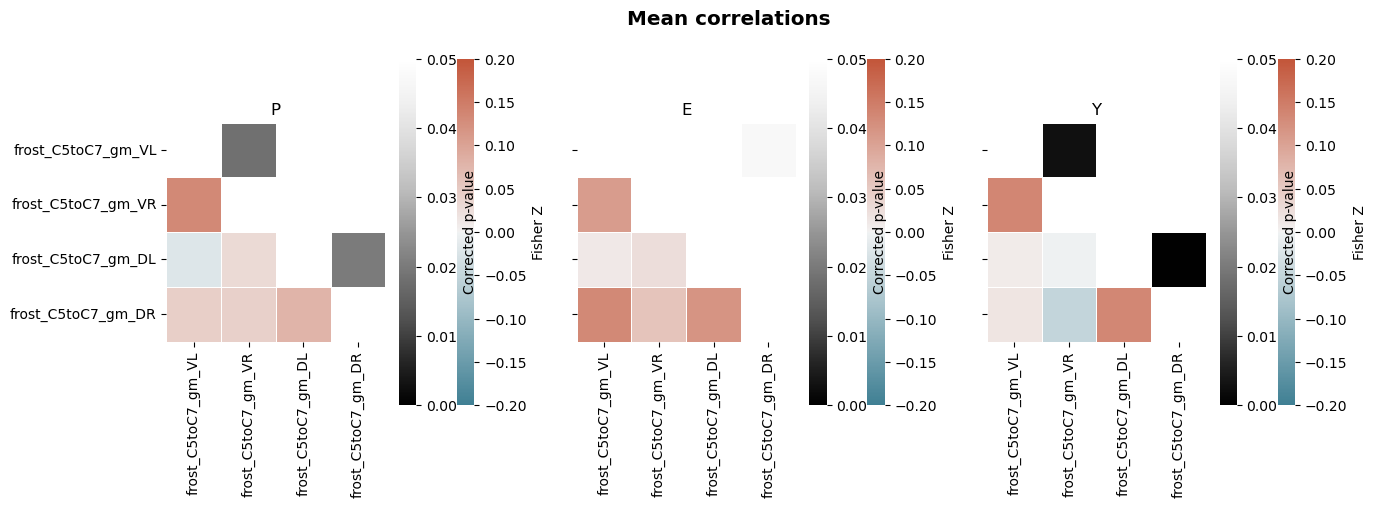

In [51]:
corrs_df,corrs_stats_df = sFC.compute_correlations(tcs=tcs)

COMPARE FC PATTERNS BETWEEN GROUPS
Group 1: P
Group 2: Y


(                  roi1                roi2         p
 0   frost_C5toC7_gm_VL  frost_C5toC7_gm_VL  0.257568
 1   frost_C5toC7_gm_VL  frost_C5toC7_gm_VR  0.898552
 2   frost_C5toC7_gm_VL  frost_C5toC7_gm_DL  0.372160
 3   frost_C5toC7_gm_VL  frost_C5toC7_gm_DR  0.547822
 4   frost_C5toC7_gm_VR  frost_C5toC7_gm_VL  0.898552
 5   frost_C5toC7_gm_VR  frost_C5toC7_gm_VR  0.772406
 6   frost_C5toC7_gm_VR  frost_C5toC7_gm_DL  0.391993
 7   frost_C5toC7_gm_VR  frost_C5toC7_gm_DR  0.025078
 8   frost_C5toC7_gm_DL  frost_C5toC7_gm_VL  0.372160
 9   frost_C5toC7_gm_DL  frost_C5toC7_gm_VR  0.391993
 10  frost_C5toC7_gm_DL  frost_C5toC7_gm_DL  0.262688
 11  frost_C5toC7_gm_DL  frost_C5toC7_gm_DR  0.251210
 12  frost_C5toC7_gm_DR  frost_C5toC7_gm_VL  0.547822
 13  frost_C5toC7_gm_DR  frost_C5toC7_gm_VR  0.025078
 14  frost_C5toC7_gm_DR  frost_C5toC7_gm_DL  0.251210
 15  frost_C5toC7_gm_DR  frost_C5toC7_gm_DR  0.814603,
 array([[  nan, -0.  , -0.03,  0.03],
        [-0.  ,   nan,  0.03,  0.09],
     

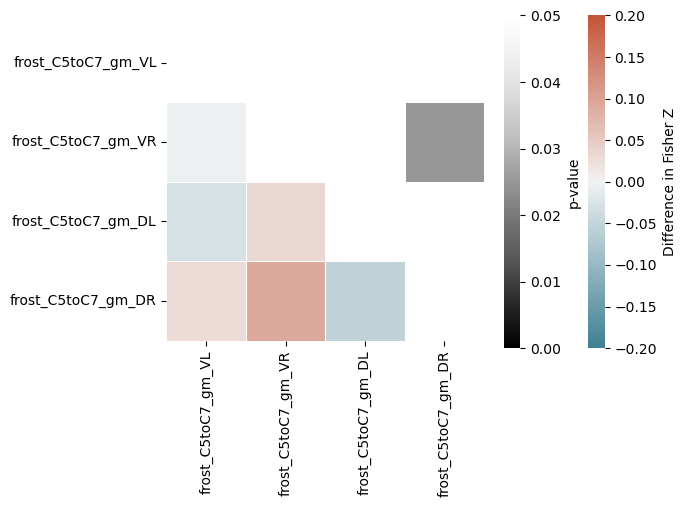

In [52]:
sFC.compare_correlations(corrs_df, ['P','Y'], paired=False)

In [36]:
corrs_df

,sub,sess,roi1,roi2,rho_Z
0,SUVA-TIMES-002,T3,iCAP_C5toC7_CST_L,iCAP_C5toC7_CST_L,18.368400
1,SUVA-TIMES-002,T3,iCAP_C5toC7_CST_L,iCAP_C5toC7_CST_R,0.093489
2,SUVA-TIMES-002,T3,iCAP_C5toC7_CST_R,iCAP_C5toC7_CST_L,0.093489
3,SUVA-TIMES-002,T3,iCAP_C5toC7_CST_R,iCAP_C5toC7_CST_R,inf
4,SUVA-TIMES-003,T3,iCAP_C5toC7_CST_L,iCAP_C5toC7_CST_L,inf
...,...,...,...,...,...
79,sub-009,,iCAP_C5toC7_CST_R,iCAP_C5toC7_CST_R,inf
80,sub-011,,iCAP_C5toC7_CST_L,iCAP_C5toC7_CST_L,inf
81,sub-011,,iCAP_C5toC7_CST_L,iCAP_C5toC7_CST_R,0.083622
82,sub-011,,iCAP_C5toC7_CST_R,iCAP_C5toC7_CST_L,0.083622


#### 2b. Link with functional connectivity
_Note: for the next steps, select corrs_totest(_names) based on config & chosen analyses_

#### Option 1: Interhemispheric FC

_**If using whole cord**_

In [95]:
vv = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='iCAP_C5toC7_VR') & (corrs_df['roi2']=='iCAP_C5toC7_VL')]['rho_Z'].values]
dd = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='iCAP_C5toC7_DR') & (corrs_df['roi2']=='iCAP_C5toC7_DL')]['rho_Z'].values]
dv_r = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='iCAP_C5toC7_VR') & (corrs_df['roi2']=='iCAP_C5toC7_DR')]['rho_Z'].values]    
dv_l = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='iCAP_C5toC7_VL') & (corrs_df['roi2']=='iCAP_C5toC7_DL')]['rho_Z'].values]   
vr_dl = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='iCAP_C5toC7_VR') & (corrs_df['roi2']=='iCAP_C5toC7_DL')]['rho_Z'].values]    
vl_dr = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='iCAP_C5toC7_VL') & (corrs_df['roi2']=='iCAP_C5toC7_DR')]['rho_Z'].values]    
# For all
#corrs_totest = np.transpose(np.concatenate((vv,dd,dv_r,dv_l,vr_dl,vl_dr),axis=0))
#corrs_totest_names = ['V-V','D-D','D-V (R)', 'D-V (L)', 'VR-DL', 'VL-DR']

# Just for DD VV
corrs_totest = np.transpose(np.concatenate((vv,dd),axis=0))
corrs_totest_names = ['V-V','D-D']

In [14]:
vv = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='frost_C5toC7_gm_VR') & (corrs_df['roi2']=='frost_C5toC7_gm_VL')]['rho_Z'].values]
dd = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='frost_C5toC7_gm_DR') & (corrs_df['roi2']=='frost_C5toC7_gm_DL')]['rho_Z'].values]
# For all
#corrs_totest = np.transpose(np.concatenate((vv,dd,dv_r,dv_l,vr_dl,vl_dr),axis=0))
#corrs_totest_names = ['V-V','D-D','D-V (R)', 'D-V (L)', 'VR-DL', 'VL-DR']

# Just for DD VV
corrs_totest = np.transpose(np.concatenate((vv,dd),axis=0))
corrs_totest_names = ['V-V','D-D']

_**If using all individual spinal levels**_

In [ ]:
c5_vv = [corrs_df[(corrs_df['roi1']=='C5_VR') & (corrs_df['roi2']=='C5_VL')]['rho_Z'].values]
c5_dd = [corrs_df[(corrs_df['roi1']=='C5_DR') & (corrs_df['roi2']=='C5_DL')]['rho_Z'].values]
c6_vv = [corrs_df[(corrs_df['roi1']=='C6_VR') & (corrs_df['roi2']=='C6_VL')]['rho_Z'].values]
c6_dd = [corrs_df[(corrs_df['roi1']=='C6_DR') & (corrs_df['roi2']=='C6_DL')]['rho_Z'].values]
c7_vv = [corrs_df[(corrs_df['roi1']=='C7_VR') & (corrs_df['roi2']=='C7_VL')]['rho_Z'].values]
c7_dd = [corrs_df[(corrs_df['roi1']=='C7_DR') & (corrs_df['roi2']=='C7_DL')]['rho_Z'].values]
corrs_totest = np.transpose(np.concatenate((c5_vv,c5_dd,c6_vv,c6_dd,c7_vv,c7_dd),axis=0))
corrs_totest_names = ['C5 V-V','C5 D-D','C6 V-V','C6 D-D','C7 V-V','C7 D-D']

#### Option 2: Significant FC

_Note: there were 3 significant correlations: **(1)** C5DR-C5VR, **(2)** C6DL-C6DR, **(3)** C6DR-C6VR_

In [94]:
C5DR_C5VR = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='C5_DR') & (corrs_df['roi2']=='C5_VR')]['rho_Z'].values]
C6DL_C6DR  = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='C6_DL') & (corrs_df['roi2']=='C6_DR')]['rho_Z'].values]
C6DR_C6VR = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='C6_DR') & (corrs_df['roi2']=='C6_VR')]['rho_Z'].values]
corrs_totest = np.transpose(np.concatenate((C5DR_C5VR,C6DL_C6DR,C6DR_C6VR),axis=0))
corrs_totest_names = ['C5DR-C5VR','C6DL-C6DR','C6DR-C6VR']

#### ! To run for all options

In [15]:
corrs_totest

array([[ 0.01,  0.06],
       [-0.01,  0.08],
       [ 0.38,  0.04],
       [ 0.28,  0.01],
       [ 0.  ,  0.03],
       [ 0.26,  0.11],
       [-0.03,  0.08],
       [ 0.23,  0.22],
       [ 0.03, -0.11],
       [ 0.27, -0.02],
       [ 0.07,  0.1 ],
       [ 0.16,  0.16],
       [ 0.16,  0.12],
       [ 0.07,  0.2 ]])

,tested,clinical,rho,p
0,V-V,fm,0.140648,0.662843
1,D-D,fm,-0.159289,0.620961
2,V-V,mas,-0.210421,0.511544
3,D-D,mas,0.160834,0.617535
4,V-V,pinch,0.107940,0.738449
5,D-D,pinch,-0.039747,0.902390
6,V-V,CST,0.115439,0.720899
7,D-D,CST,0.150829,0.639849
8,V-V,vol,-0.012305,0.969725
9,D-D,vol,-0.089225,0.782737


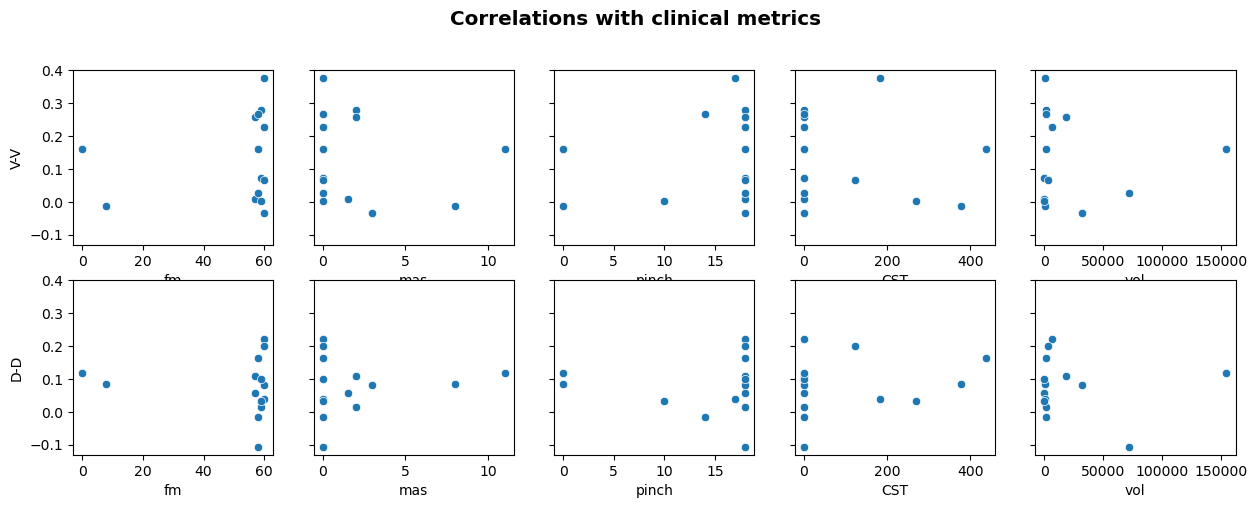

In [16]:
patients.compute_correlations(clinical_data=clinical_info,clinical_names=['fm','mas','pinch','CST','vol'],totest_values=corrs_totest,totest_names=corrs_totest_names)


In [160]:
frames_df = pd.read_csv('/media/miplab-nas2/Data3/SpinalCord/4_Age_Stroke/iCAPs_results/PAM50_C5toC7_14P_Alpha_5_95_Fraction_0DOT05/K_30_Dist_cosine_Folds_20/Frames.csv',header=None, names=['iCAP1','iCAP2','iCAP3','iCAP4','iCAP5','iCAP6','iCAP7','iCAP8','iCAP9','iCAP10','iCAP11','iCAP12','iCAP13','iCAP14','iCAP15','iCAP16','iCAP17','iCAP18','iCAP19','iCAP20','iCAP21','iCAP22','iCAP23','iCAP24','iCAP25','iCAP26','iCAP27','iCAP28','iCAP29','iCAP30'])

In [168]:
frames = np.loadtxt('/media/miplab-nas2/Data3/SpinalCord/4_Age_Stroke/iCAPs_results/PAM50_C5toC7_14P_Alpha_5_95_Fraction_0DOT05/K_30_Dist_cosine_Folds_20/Frames.csv',delimiter=",")

In [185]:
frames[:,[3,6,16,21]]

array([[14., 11., 13., 10.],
       [17., 21., 16., 14.],
       [10., 11., 11.,  5.],
       [18., 19., 18., 10.],
       [27., 17.,  9.,  9.],
       [ 9., 14., 16.,  6.],
       [29., 22., 13.,  8.],
       [23., 13., 12., 10.],
       [17., 17., 12., 14.],
       [20., 11., 11.,  6.],
       [16., 24., 14., 19.],
       [15., 20., 13.,  6.],
       [18., 13.,  6., 18.],
       [11.,  8., 14., 15.]])

In [180]:
t=clinical_correlations['p']<0.01
[i for i, x in enumerate(t) if x]

[130]

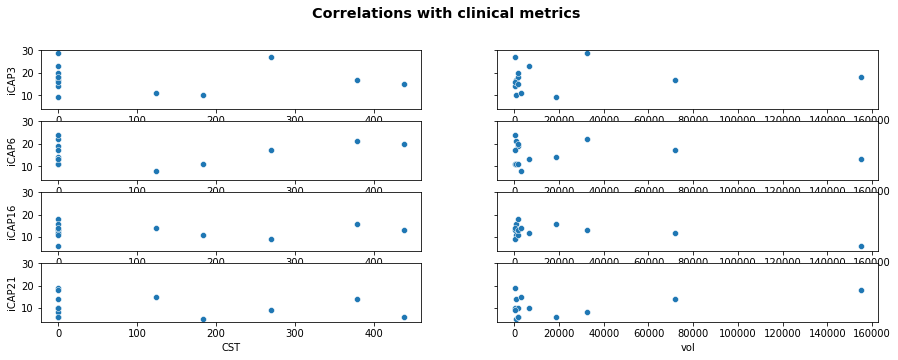

In [188]:
clinical_correlations=patients.compute_correlations(clinical_data=clinical_info,clinical_names=['CST','vol'],totest_values=frames[:,[3,6,16,21]],totest_names=['iCAP3','iCAP6','iCAP16','iCAP21'])

In [189]:
clinical_correlations

,tested,clinical,rho,p
0,iCAP3,CST,-0.295225,0.351547
1,iCAP6,CST,0.332495,0.290981
2,iCAP16,CST,0.594227,0.041598
3,iCAP21,CST,-0.205937,0.520788
4,iCAP3,vol,0.012047,0.970358
5,iCAP6,vol,-0.116399,0.718662
6,iCAP16,vol,-0.677699,0.015448
7,iCAP21,vol,0.460771,0.131674


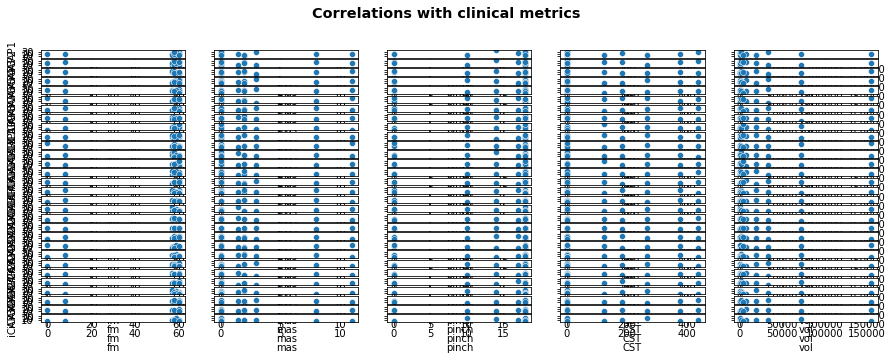

In [179]:
clinical_correlations=patients.compute_correlations(clinical_data=clinical_info,clinical_names=['fm','mas','pinch','CST','vol'],totest_values=frames,totest_names=['iCAP1','iCAP2','iCAP3','iCAP4','iCAP5','iCAP6','iCAP7','iCAP8','iCAP9','iCAP10','iCAP11','iCAP12','iCAP13','iCAP14','iCAP15','iCAP16','iCAP17','iCAP18','iCAP19','iCAP20','iCAP21','iCAP22','iCAP23','iCAP24','iCAP25','iCAP26','iCAP27','iCAP28','iCAP29','iCAP30'])

#### Test with classification

In [86]:
# Extract corr for controls (already done above for patients)
vv = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_VR') & (corrs_df['roi2']=='mask_midC5toC7_gm_VL')]['rho_Z'].values]
dd = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_DR') & (corrs_df['roi2']=='mask_midC5toC7_gm_DL')]['rho_Z'].values]
dv_r = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_VR') & (corrs_df['roi2']=='mask_midC5toC7_gm_DR')]['rho_Z'].values]    
dv_l = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_VL') & (corrs_df['roi2']=='mask_midC5toC7_gm_DL')]['rho_Z'].values]   
vr_dl = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_VR') & (corrs_df['roi2']=='mask_midC5toC7_gm_DL')]['rho_Z'].values]    
vl_dr = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_VL') & (corrs_df['roi2']=='mask_midC5toC7_gm_DR')]['rho_Z'].values]    
corrs_totest_H = np.transpose(np.concatenate((vv,dd,dv_r,dv_l,vr_dl,vl_dr),axis=0))


In [107]:
# Create dataframe
corrs_totest_P_withgrp = np.hstack((corrs_totest_P, 2*np.ones((corrs_totest_P.shape[0], 1))))
corrs_totest_H_withgrp = np.hstack((corrs_totest_H, np.ones((corrs_totest_H.shape[0], 1))))
data_classif = np.concatenate([corrs_totest_P_withgrp, corrs_totest_H_withgrp],axis=0)
col_names = ['V-V','D-D','D-V (R)', 'D-V (L)', 'VR-DL', 'VL-DR', 'grp']
data_classif_df = pd.DataFrame(data=data_classif, columns=col_names)

In [110]:
data_classif_df['grp'] = data_classif_df['grp'].astype('int')

In [121]:
X = data_classif_df[col_names[:-1]]
y = data_classif_df[col_names[-1]]

In [135]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X = sc.fit_transform(X) 

In [136]:
# Fitting Kernel SVM to the Training set 
from sklearn.svm import SVC 
classifier = SVC(kernel = 'rbf', random_state = 0) 
classifier.fit(X, y) 


SVC(random_state=0)

In [139]:
# Applying k-Fold Cross Validation 
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv = 8) 
accuracies.mean() 
accuracies.std()

0.0721687836487032

#### 3. ALFF analyses

In [ ]:
sFC.compute_alff_maps()

ALFF IN ROIS
Overwrite old files: True
Extracting ALFF for subject SUVA-TIMES-002
...Session T3
231030-12:50:49,469 nipype.interface INFO:
	 stdout 2023-10-30T12:50:49.469189:1.614804 
231030-12:50:50,196 nipype.interface INFO:
	 stdout 2023-10-30T12:50:50.195906:1.572717 
231030-12:50:50,870 nipype.interface INFO:
	 stdout 2023-10-30T12:50:50.870116:1.467526 
231030-12:50:51,609 nipype.interface INFO:
	 stdout 2023-10-30T12:50:51.609673:1.463413 
Extracting ALFF for subject SUVA-TIMES-003
...Session T3
231030-12:50:52,375 nipype.interface INFO:
	 stdout 2023-10-30T12:50:52.375527:1.939050 
231030-12:50:53,33 nipype.interface INFO:
	 stdout 2023-10-30T12:50:53.033057:1.968394 
231030-12:50:53,664 nipype.interface INFO:
	 stdout 2023-10-30T12:50:53.664006:2.088278 
231030-12:50:54,328 nipype.interface INFO:
	 stdout 2023-10-30T12:50:54.328730:2.076734 
Extracting ALFF for subject SUVA-TIMES-006
...Session T3
231030-12:50:55,67 nipype.interface INFO:
	 stdout 2023-10-30T12:50:55.067707:1

Extracting ALFF for subject sub-011
...Session 
231030-12:51:42,154 nipype.interface INFO:
	 stdout 2023-10-30T12:51:42.153950:1.644519 
231030-12:51:42,790 nipype.interface INFO:
	 stdout 2023-10-30T12:51:42.790703:1.700908 
231030-12:51:43,404 nipype.interface INFO:
	 stdout 2023-10-30T12:51:43.403935:1.873325 
231030-12:51:44,28 nipype.interface INFO:
	 stdout 2023-10-30T12:51:44.028693:1.821702 
Extracting ALFF for subject sub-012
...Session 
231030-12:51:44,633 nipype.interface INFO:
	 stdout 2023-10-30T12:51:44.633151:1.461947 
231030-12:51:45,269 nipype.interface INFO:
	 stdout 2023-10-30T12:51:45.269293:1.752586 
231030-12:51:45,876 nipype.interface INFO:
	 stdout 2023-10-30T12:51:45.875901:1.829699 
231030-12:51:46,503 nipype.interface INFO:
	 stdout 2023-10-30T12:51:46.503016:2.140258 


,sub,sess,roi,alff
0,SUVA-TIMES-002,T3,iCAP_C5toC7_VL,1.614804
1,SUVA-TIMES-002,T3,iCAP_C5toC7_VR,1.572717
2,SUVA-TIMES-002,T3,iCAP_C5toC7_DL,1.467526
3,SUVA-TIMES-002,T3,iCAP_C5toC7_DR,1.463413
4,SUVA-TIMES-003,T3,iCAP_C5toC7_VL,1.939050
...,...,...,...,...
83,sub-011,,iCAP_C5toC7_DR,1.821702
84,sub-012,,iCAP_C5toC7_VL,1.461947
85,sub-012,,iCAP_C5toC7_VR,1.752586
86,sub-012,,iCAP_C5toC7_DL,1.829699


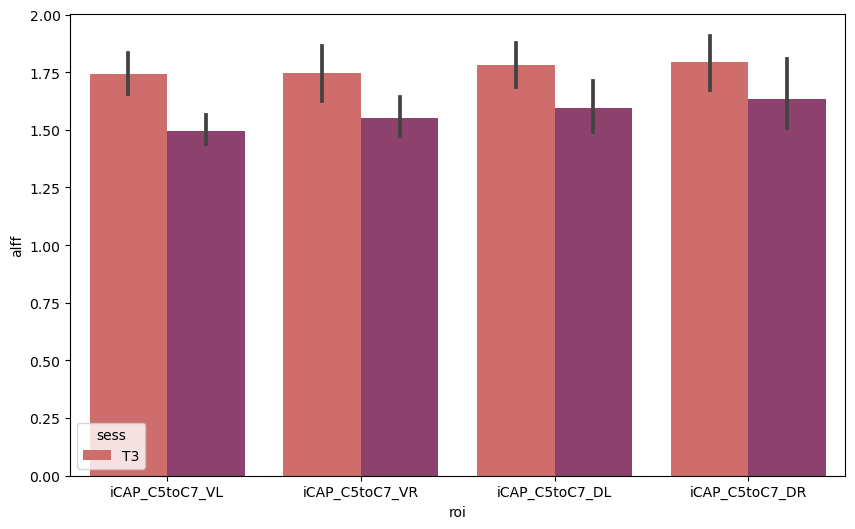

In [98]:
sFC.compute_alff_rois()